In [1]:
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt
import numpy as np

In [3]:
# each point is lenght, width, and type(0, 1)
data = [[3,   1.5, 1],
        [2,   1,   0],
        [4,   1.5, 1],
        [3,   1,   0],
        [3.5, .5,  1],
        [2,   .5,  0],
        [5.5,  1,  1],
        [1,    1,  0]]
mystery_flower = [4.1, 1]

In [4]:
w1 = np.random.randn()
w2 = np.random.randn()
b = np.random.randn()

In [5]:
w2

2.611978400010485

In [6]:
def sigmoid(x):
    return 1/(1+ np.exp(-x))
# derivative of sigmoid
def sigmoid_p(x):
    return sigmoid(x) * (1-sigmoid(x))

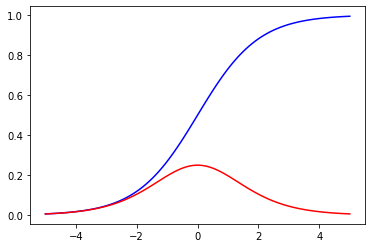

In [7]:
X = np.linspace(-5, 5, 100)

plt.plot(X, sigmoid(X), c="b") # sigmoid in blue
plt.plot(X, sigmoid_p(X), c="r") # sigmoid_p in red

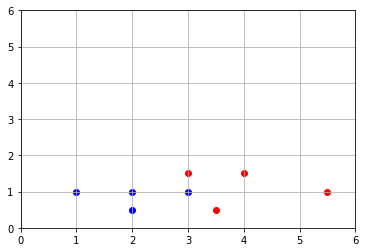

In [18]:
# scatter data
plt.axis([0, 6, 0, 6])
plt.grid()
for i in range(len(data)):
    point = data[i]
    color = 'r'
    if point[2] == 0:
        color = 'b'
    plt.scatter(point[0], point[1], c = color)

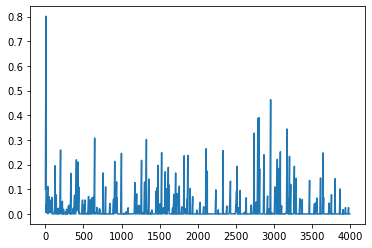

In [30]:
# training loop
# loop over our data and get a rondome point run it through the network see what it should have been and that will be our cost
# and we will take derivative of the cost with respect to network parametrs 
# use that to update the parametares by subtracting it and that will decrease the cost
# if we get mor points will be better and better

learning_rate = 0.2
costs = []

w1 = np.random.randn()
w2 = np.random.randn()
b = np.random.randn()

for i in range (50000):
    ri = np.random.randint(len(data))
    point = data[ri]
    z = point[0] * w1 + point[1] * w2 + b
    pred = sigmoid(z)
    
    target = point[2]
    cost = np.square(pred - target)
    
    
    dcost_pred = 2 * (pred - target)
    dpred_dz = sigmoid_p(z)
    
    dz_dw1 = point[0]
    dz_dw2 = point[1]
    dz_b = 1
    
    dcost_dz = dcost_pred * dpred_dz
    
    dcost_dw1 = dcost_dz * dz_dw1
    dcost_dw2 = dcost_dz * dz_dw1
    dcost_db = dcost_dz * dz_b
    
    w1 = w1 - learning_rate * dcost_dw1
    w2 = w2 - learning_rate * dcost_dw2
    b = b - learning_rate * dcost_db
    
    if i % 100 == 0:
        cost_sum = 0
        for j in range(len(data)):
            point = data[ri]
            
            z = point[0] * w1 + point[1] * w2 + b
            pred = sigmoid(z)
            
            target = point[2]
            cost_sum += np.square(pred - target)
            
            costs.append(cost_sum/len(data))
    
plt.plot(costs)
    

In [31]:
# seeing model prodiction

for i in range(len(data)):
    point= data[i]
    print(point)
    
    z = point[0] * w1 + point[1] * w2 + b
    pred = sigmoid(z)
    
    print("pred: {}".format(pred))

[3, 1.5, 1]
pred: 0.942831160748992
[2, 1, 0]
pred: 1.322757822887684e-05
[4, 1.5, 1]
pred: 0.9999962031714004
[3, 1, 0]
pred: 0.17440400922877863
[3.5, 0.5, 1]
pred: 0.2548122640380818
[2, 0.5, 0]
pred: 1.6943391490696533e-07
[5.5, 1, 1]
pred: 0.9999999998531228
[1, 1, 0]
pred: 8.282916386373794e-10


In [42]:
z = mystery_flower[0] * w1 + mystery_flower[1] * w2 + b
pred = sigmoid(z)
pred

0.999887402403188

In [43]:
import os

In [52]:
os.system("say hi")

1

In [53]:
def which_flower(length, width):
    z = length * w1 + width * w2 + b
    pred = sigmoid(z)
    
    if pred < .5:
        os.system("say blue")
    else:
        os.system("say red")
    

In [54]:
which_flower(2, 1)